In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install openpyxl  # For reading .xlsx files
!pip install pyxlsb

In [2]:
import pandas as pd

# Load my file
file_path = '/kaggle/input/fundingdf/DistrictCostDatabase_2024 (1).xlsb'  
df = pd.read_excel(file_path, engine='pyxlsb')

print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll       pov       iep       ell     amind  \
0       -3949   -0.373566    3849  0.302567  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  0.334258  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  0.339477  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  0.444417  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  0.389776  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  
0  0.004427  0.022917  0.317

In [6]:
print(df.tail())

        year    leaid                          district state_name stabbr  \
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll       pov       iep  \
159029    24186     10106       14080    0.518236     258  0.048583  0.139535   
159030    22669     10883       11786    0.199631     254  0.059055  0.141732   
159031    26525     11715       14810    0.053610     223  0.048193  0.165919   
159032    26472     13563       12909         NaN     235  0.102881  0.170213   
159033    28640     12504       16136         NaN     222  0.063063       NaN   

             ell     amind  asian     black      h

In [3]:
print(df.dtypes)

year            int64
leaid           int64
district       object
state_name     object
stabbr         object
ppcstot         int64
predcost        int64
fundinggap      int64
outcomegap    float64
enroll          int64
pov           float64
iep           float64
ell           float64
amind         float64
asian         float64
black         float64
hisp          float64
multi         float64
pac           float64
white         float64
dtype: object


In [4]:
print(df.describe())

                year         leaid        ppcstot       predcost  \
count  159034.000000  1.590340e+05  159034.000000  159034.000000   
mean     2014.946370  3.012129e+06   12254.636625   11703.865570   
std         3.738836  1.470075e+06    4572.360238    6247.861275   
min      2009.000000  1.000050e+05     251.000000    3282.000000   
25%      2012.000000  1.808010e+06    9216.000000    7991.000000   
50%      2015.000000  3.028911e+06   10931.000000   10098.000000   
75%      2018.000000  4.104590e+06   13981.000000   13305.750000   
max      2021.000000  5.606240e+06  130849.000000   94853.000000   

          fundinggap     outcomegap        enroll            pov  \
count  159034.000000  113880.000000  1.590340e+05  159034.000000   
mean      550.772099       0.024527  3.861922e+03       0.172366   
std      7433.439068       0.353197  1.518221e+04       0.095372   
min    -85859.000000      -3.797798  1.000000e+02       0.000000   
25%     -2412.000000      -0.194640  5.120000e+

In [5]:
print(df.isnull().sum())

year              0
leaid             0
district          0
state_name        0
stabbr            0
ppcstot           0
predcost          0
fundinggap        0
outcomegap    45154
enroll            0
pov               0
iep            4011
ell            1286
amind             0
asian             0
black             0
hisp              0
multi         19668
pac           22171
white             0
dtype: int64


In [7]:
mode_value = df['outcomegap'].mode()[0]  # Get the mode
df['outcomegap'].fillna(mode_value, inplace=True)

/tmp/ipykernel_30/4103439758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['outcomegap'].fillna(mode_value, inplace=True)


In [8]:
mode_value = df['iep'].mode()[0]  # Get the mode
df['iep'].fillna(mode_value, inplace=True)

/tmp/ipykernel_30/334487649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['iep'].fillna(mode_value, inplace=True)


In [9]:
for column in ['multi', 'pac']:
    mode_value = df[column].mode()[0]  # Get the mode for each column
    df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode

/tmp/ipykernel_30/3529193303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Fill missing values with mode


In [11]:
mode_value = df['ell'].mode()[0]  # Get the mode
df['ell'].fillna(mode_value, inplace=True)

/tmp/ipykernel_30/2214839241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ell'].fillna(mode_value, inplace=True)


In [12]:
print(df.isnull().sum())

year          0
leaid         0
district      0
state_name    0
stabbr        0
ppcstot       0
predcost      0
fundinggap    0
outcomegap    0
enroll        0
pov           0
iep           0
ell           0
amind         0
asian         0
black         0
hisp          0
multi         0
pac           0
white         0
dtype: int64


In [13]:
# This code creates a function that produces a new column to identify the racial majority of a School District

def majority_minority(row):

  """

  This function will check which racial grouping, White/Asian or Black/Hispanic/American Indian, 

  comprises over 50% of the student population

  """

  # Combine percentages for White/Asian and URM groups

  white_asian_percentage = row['white'] + row['asian']

  minority_percentage = row['black'] + row['hisp'] + row['amind']+ row['multi']+ row['pac']

  

  if white_asian_percentage > 0.50:

      return "White/Asian Majority"

  elif minority_percentage > 0.50:

      return "URM Majority"

  else:

      return "Mixed"

 

# Run the function to create the new column

df['Majority_Group'] = df.apply(majority_minority, axis=1)
print(df.head())

   year   leaid          district state_name stabbr  ppcstot  predcost  \
0  2009  100005  ALBERTVILLE CITY    Alabama     AL     8608     12557   
1  2010  100005  ALBERTVILLE CITY    Alabama     AL     8688     12567   
2  2011  100005  ALBERTVILLE CITY    Alabama     AL     8492     11509   
3  2012  100005  ALBERTVILLE CITY    Alabama     AL     8157     15540   
4  2013  100005  ALBERTVILLE CITY    Alabama     AL     8069     14412   

   fundinggap  outcomegap  enroll  ...       iep       ell     amind  \
0       -3949   -0.373566    3849  ...  0.009353  0.204729  0.001823   
1       -3879   -0.216288    4104  ...  0.074561  0.197856  0.001467   
2       -3017   -0.190391    4143  ...  0.063481  0.144340  0.000483   
3       -7383   -0.117687    4140  ...  0.075604  0.143720  0.001208   
4       -6343   -0.278603    4422  ...  0.071009  0.160271  0.001583   

      asian     black      hisp     multi       pac     white  \
0  0.004427  0.022917  0.317188  0.000000  0.000000  0.65

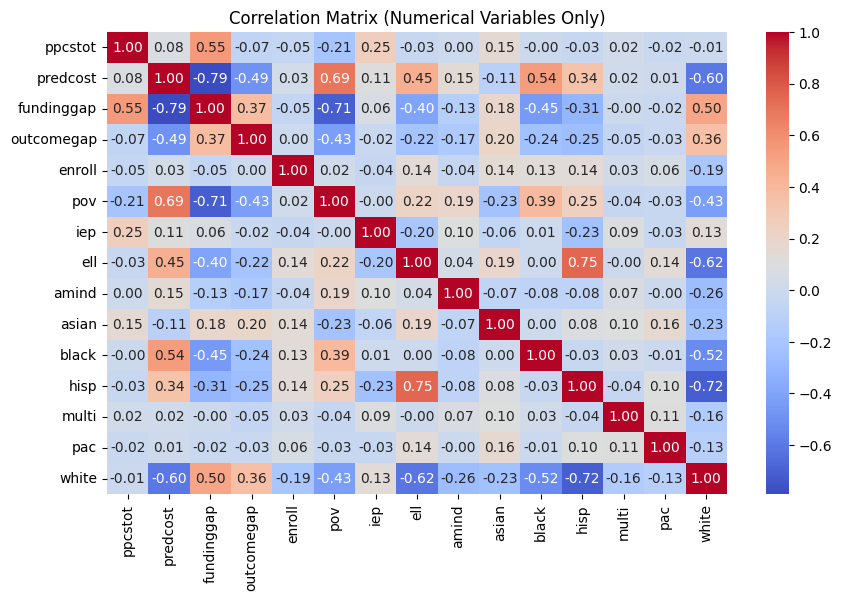

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_df = df.select_dtypes(include=['float64', 'int64'])
# Drop the unwanted columns
variables_to_remove = ['leaid', 'year'] 
numerical_df = numerical_df.drop(columns=variables_to_remove, errors='ignore')  # Ignore errors if columns not found


correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

In [16]:
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

             ppcstot  predcost  fundinggap  outcomegap    enroll       pov  \
ppcstot     1.000000  0.082020    0.546168   -0.066022 -0.045844 -0.213187   
predcost    0.082020  1.000000   -0.790056   -0.489712  0.030542  0.693680   
fundinggap  0.546168 -0.790056    1.000000    0.370996 -0.053870 -0.714176   
outcomegap -0.066022 -0.489712    0.370996    1.000000  0.004679 -0.430982   
enroll     -0.045844  0.030542   -0.053870    0.004679  1.000000  0.018597   
pov        -0.213187  0.693680   -0.714176   -0.430982  0.018597  1.000000   
iep         0.254326  0.109830    0.064125   -0.015105 -0.039320 -0.003998   
ell        -0.032433  0.454548   -0.402001   -0.222019  0.138149  0.215609   
amind       0.001110  0.152084   -0.127145   -0.168910 -0.038981  0.191767   
asian       0.154985 -0.105640    0.184124    0.198770  0.143334 -0.226327   
black      -0.001496  0.538641   -0.453652   -0.235179  0.129404  0.390236   
hisp       -0.031270  0.340277   -0.305240   -0.253777  0.136758

In [17]:
state_to_region = {
    'Alabama': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'South',
    'Georgia': 'South',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'South',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'South',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'South',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Create a new column for regions
df['Region'] = df['state_name'].map(state_to_region)

# Display the updated DataFrame
print(df)

        year    leaid                          district state_name stabbr  \
0       2009   100005                  ALBERTVILLE CITY    Alabama     AL   
1       2010   100005                  ALBERTVILLE CITY    Alabama     AL   
2       2011   100005                  ALBERTVILLE CITY    Alabama     AL   
3       2012   100005                  ALBERTVILLE CITY    Alabama     AL   
4       2013   100005                  ALBERTVILLE CITY    Alabama     AL   
...      ...      ...                               ...        ...    ...   
159029  2017  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159030  2018  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159031  2019  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159032  2020  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   
159033  2021  5606090  WESTON COUNTY SCHOOL DISTRICT #7    Wyoming     WY   

        ppcstot  predcost  fundinggap  outcomegap  enroll  ...       ell  \

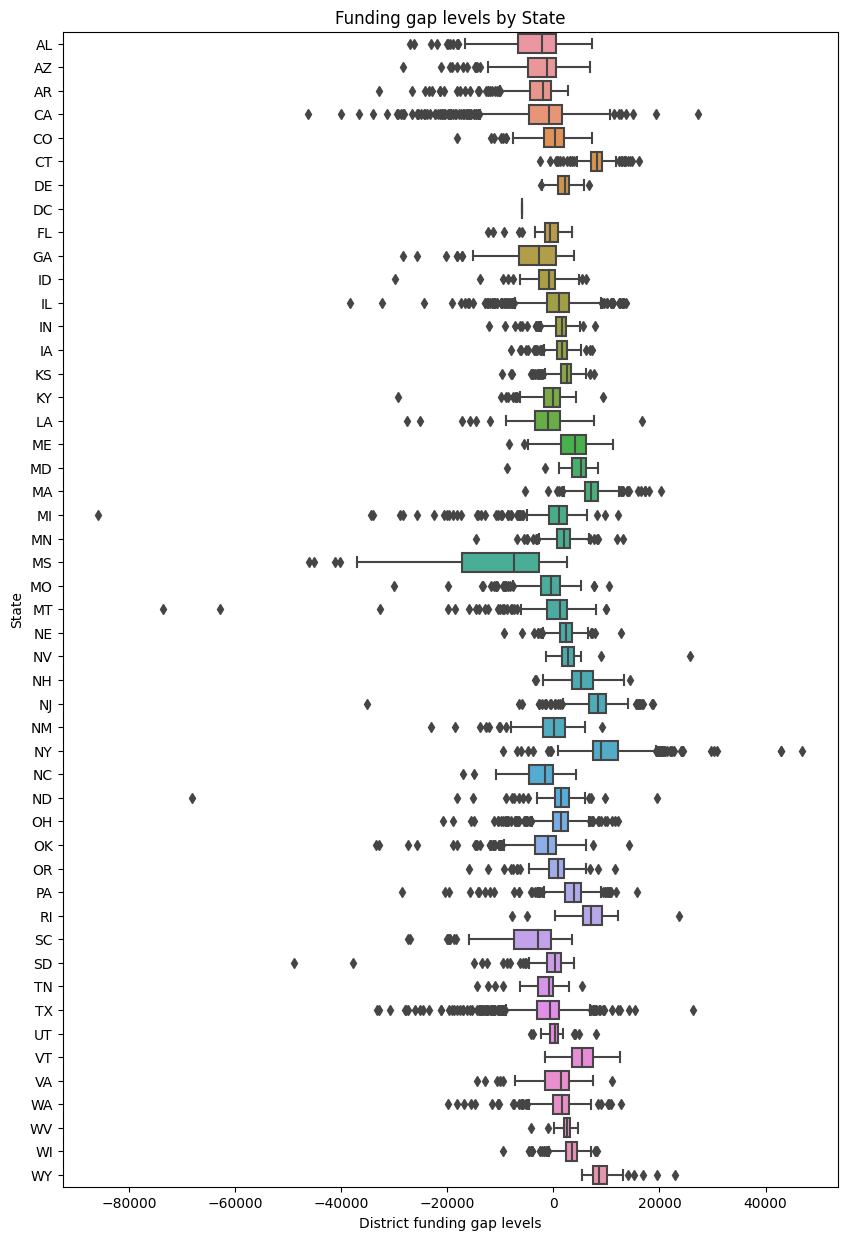

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2009]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

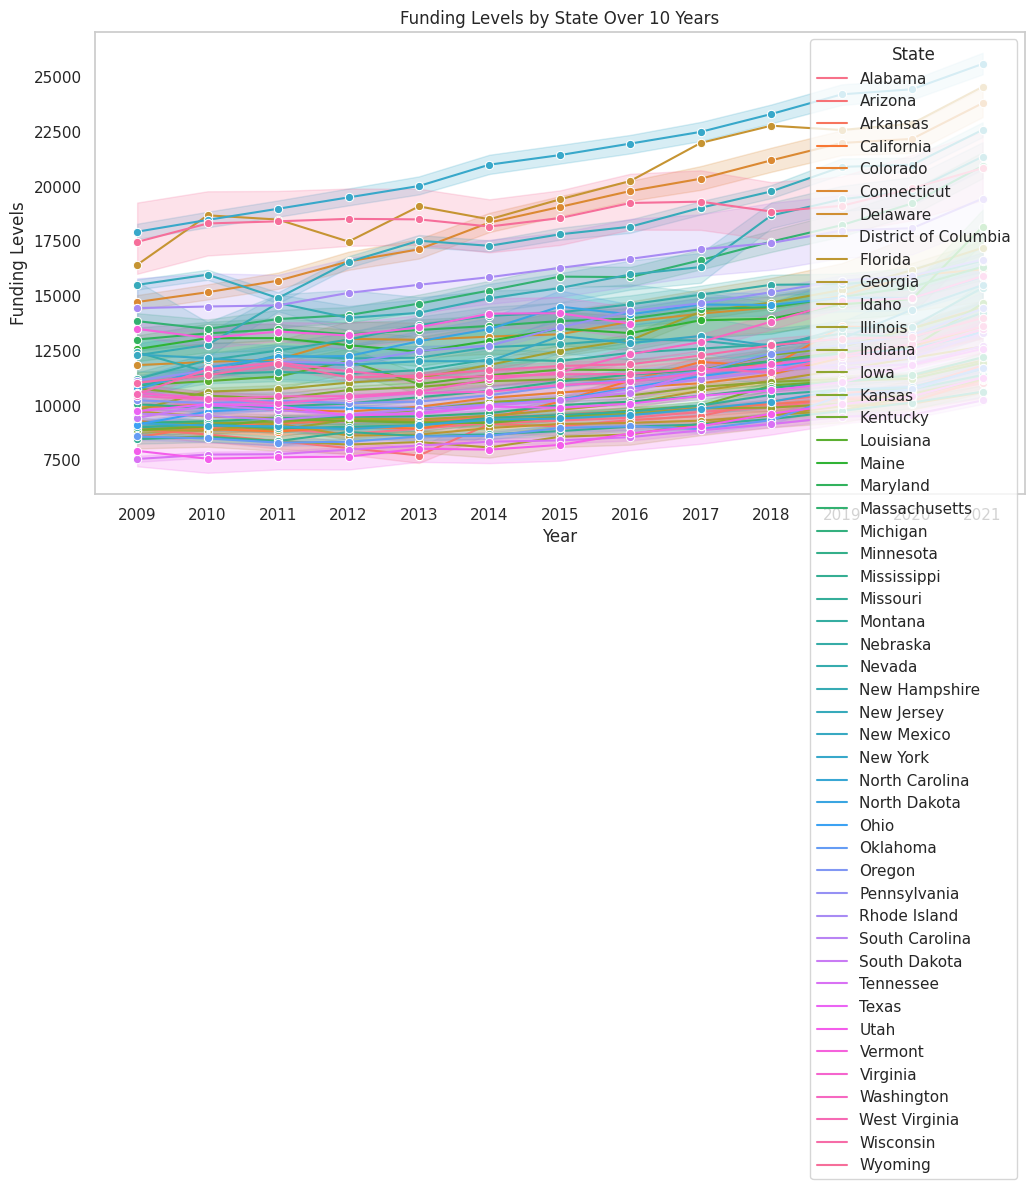

In [21]:
# Set the style
sns.set(style='whitegrid')

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='ppcstot', hue='state_name', marker='o')
plt.title('Funding Levels by State Over 10 Years')
plt.xlabel('Year')
plt.ylabel('Funding Levels')
plt.legend(title='State')
plt.xticks(df['year'].unique())  # Show all years on x-axis
plt.grid()
plt.show()

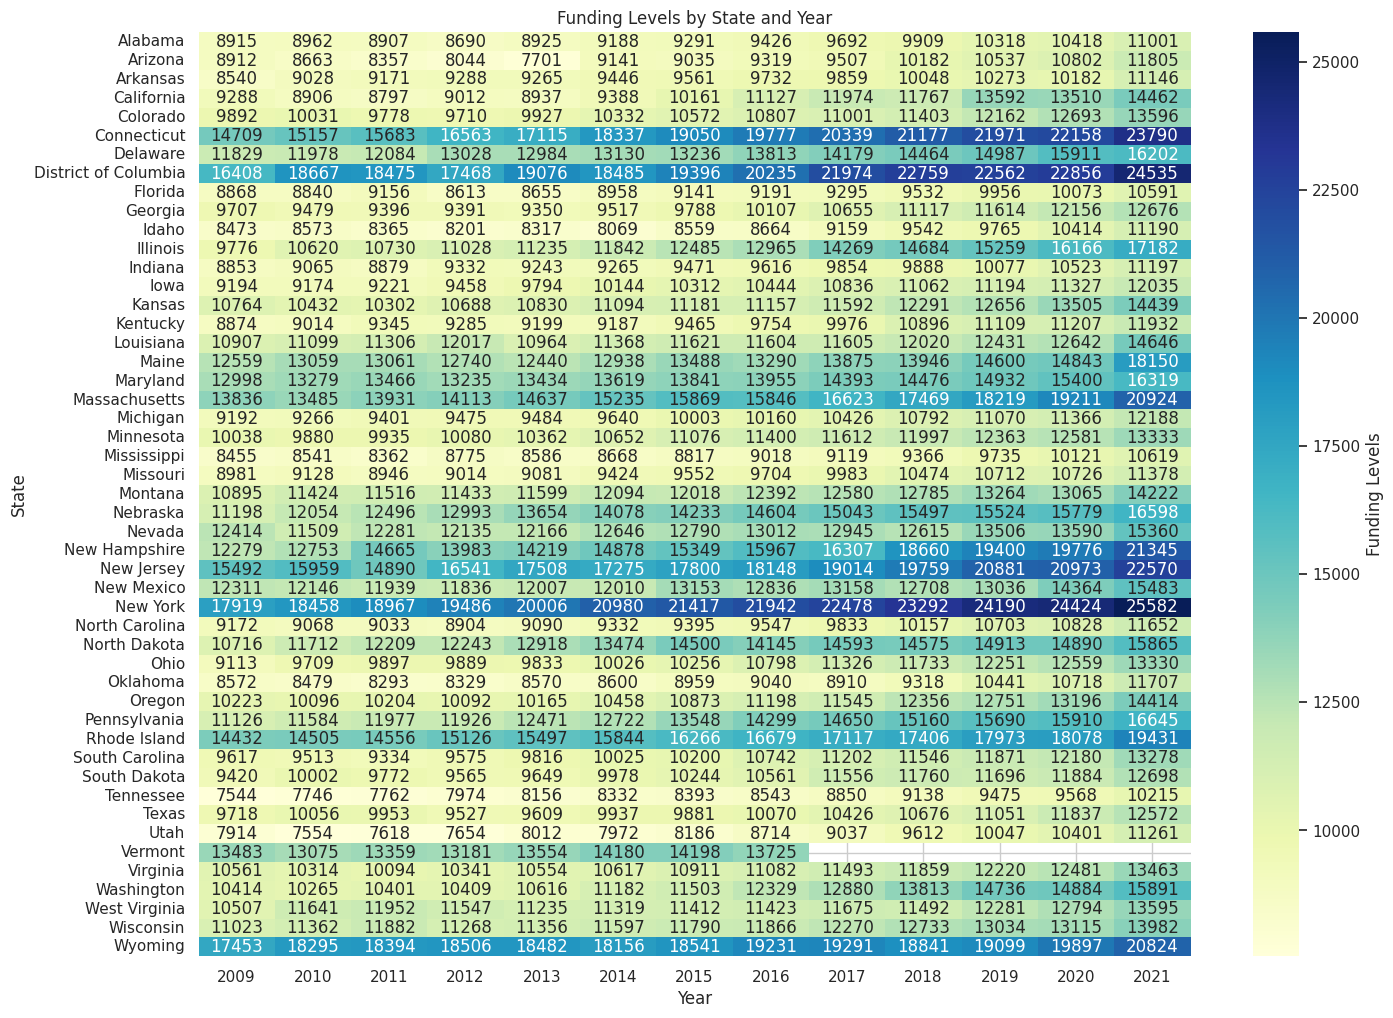

In [29]:
# Aggregate funding data by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['ppcstot'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='ppcstot')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Levels'})
plt.title('Funding Levels by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

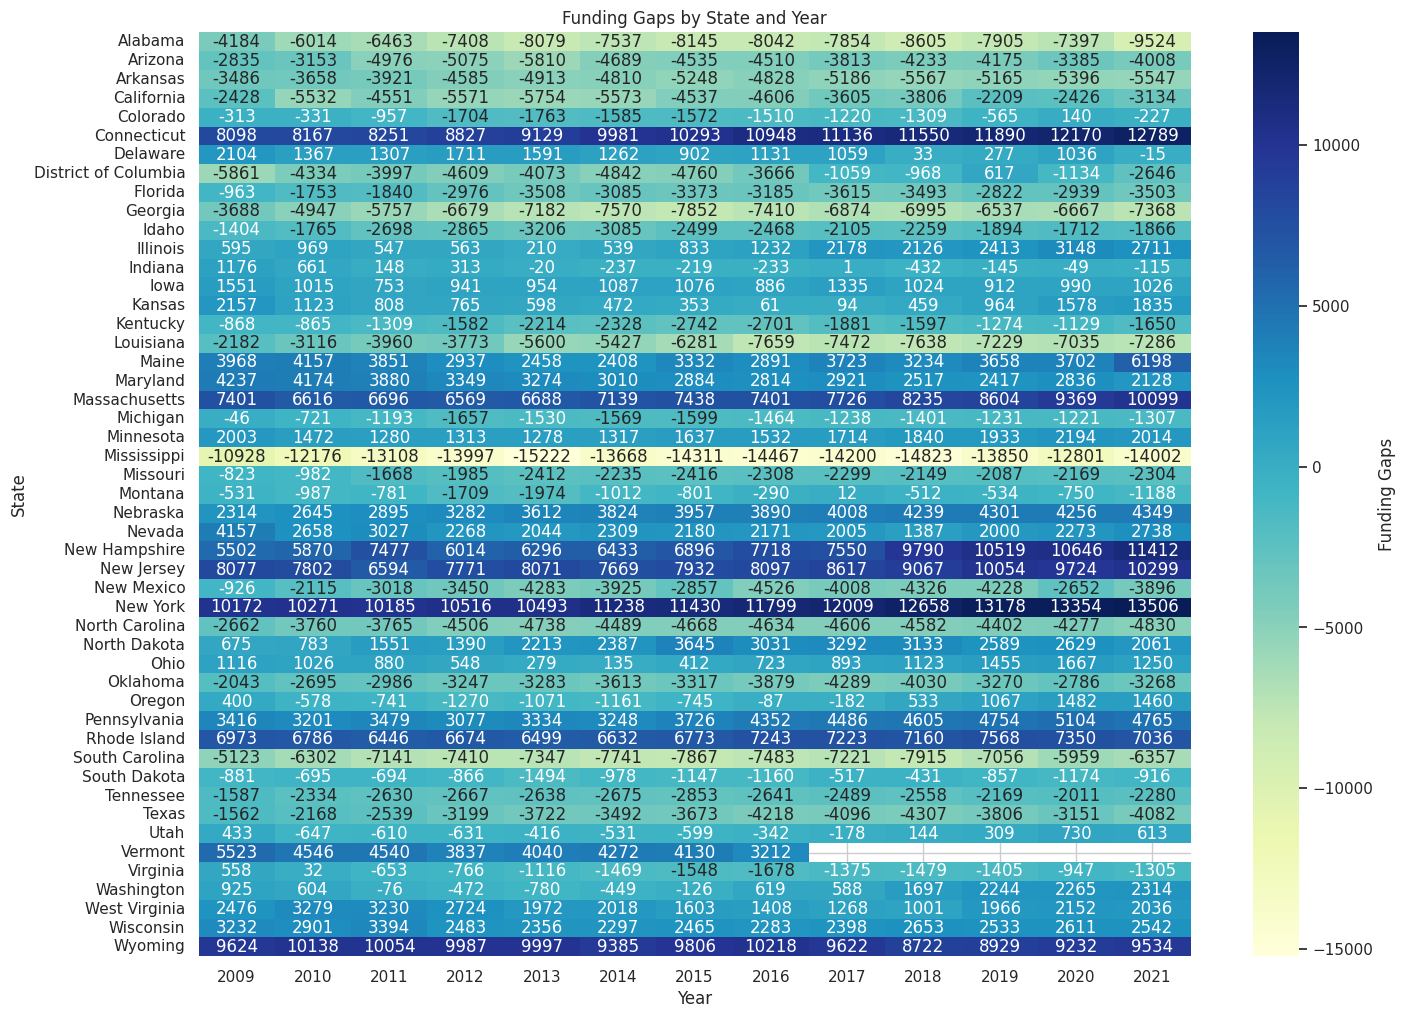

In [30]:
# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

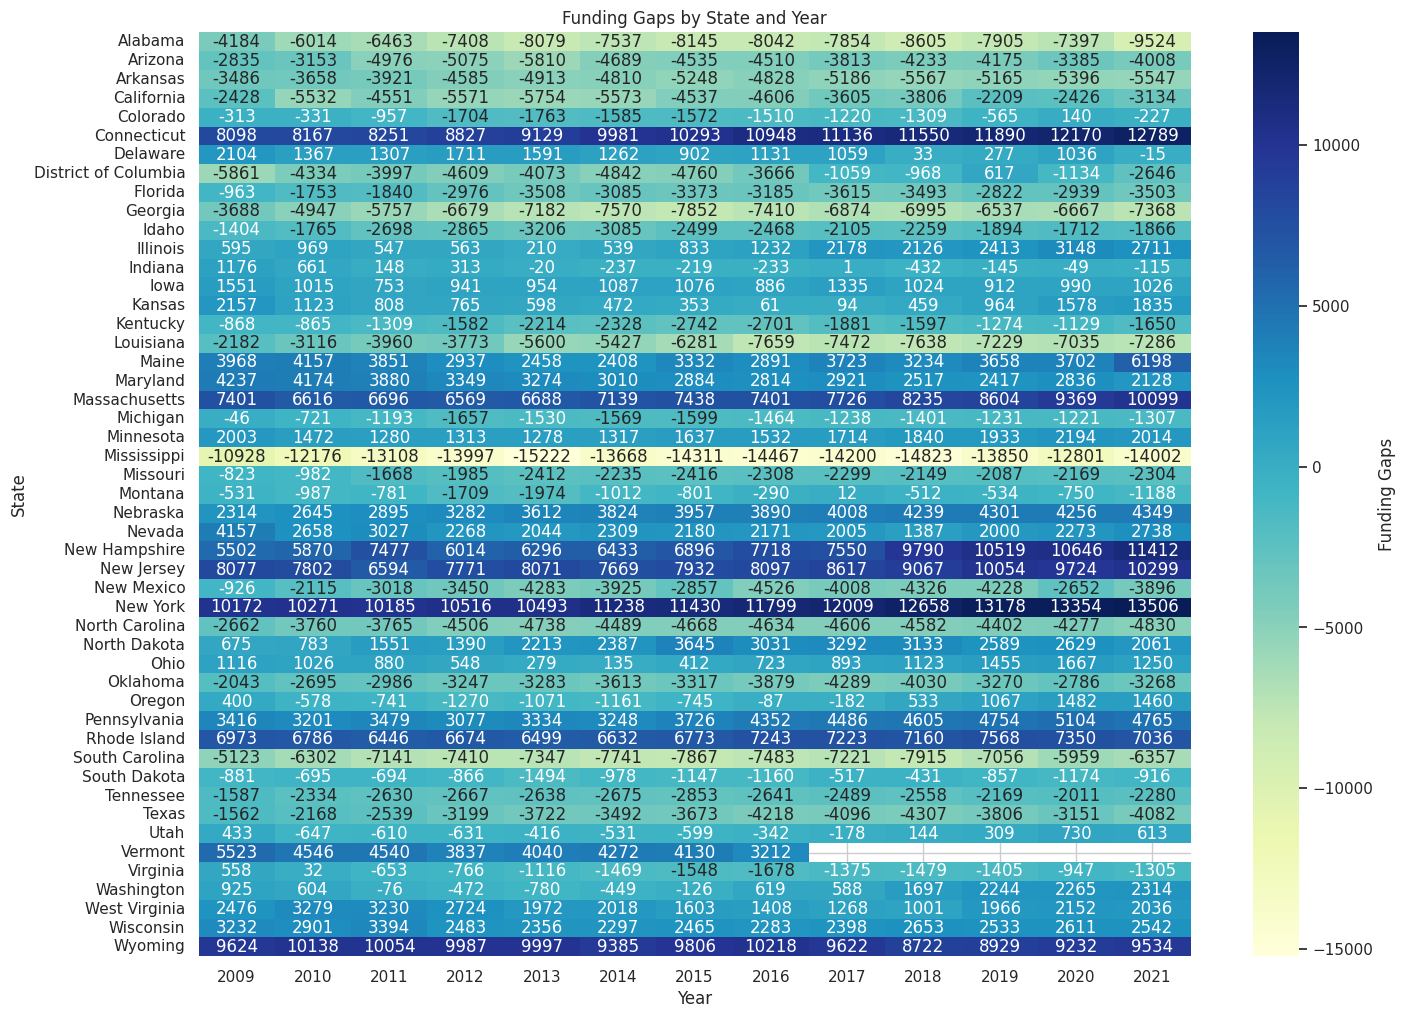

In [31]:
# play with this to redo the colors

import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate funding gaps by State and Year (e.g., taking the mean)
agg_df = df.groupby(['state_name', 'year'], as_index=False)['fundinggap'].mean()

# Pivot the aggregated DataFrame for heatmap
pivot_df = agg_df.pivot(index='state_name', columns='year', values='fundinggap')

# Create a diverging color palette from skyblue to red
cmap = sns.diverging_palette(200, 20, s=75, l=50, as_cmap=True)

# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt=".0f", cbar_kws={'label': 'Funding Gaps'})
plt.title('Funding Gaps by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

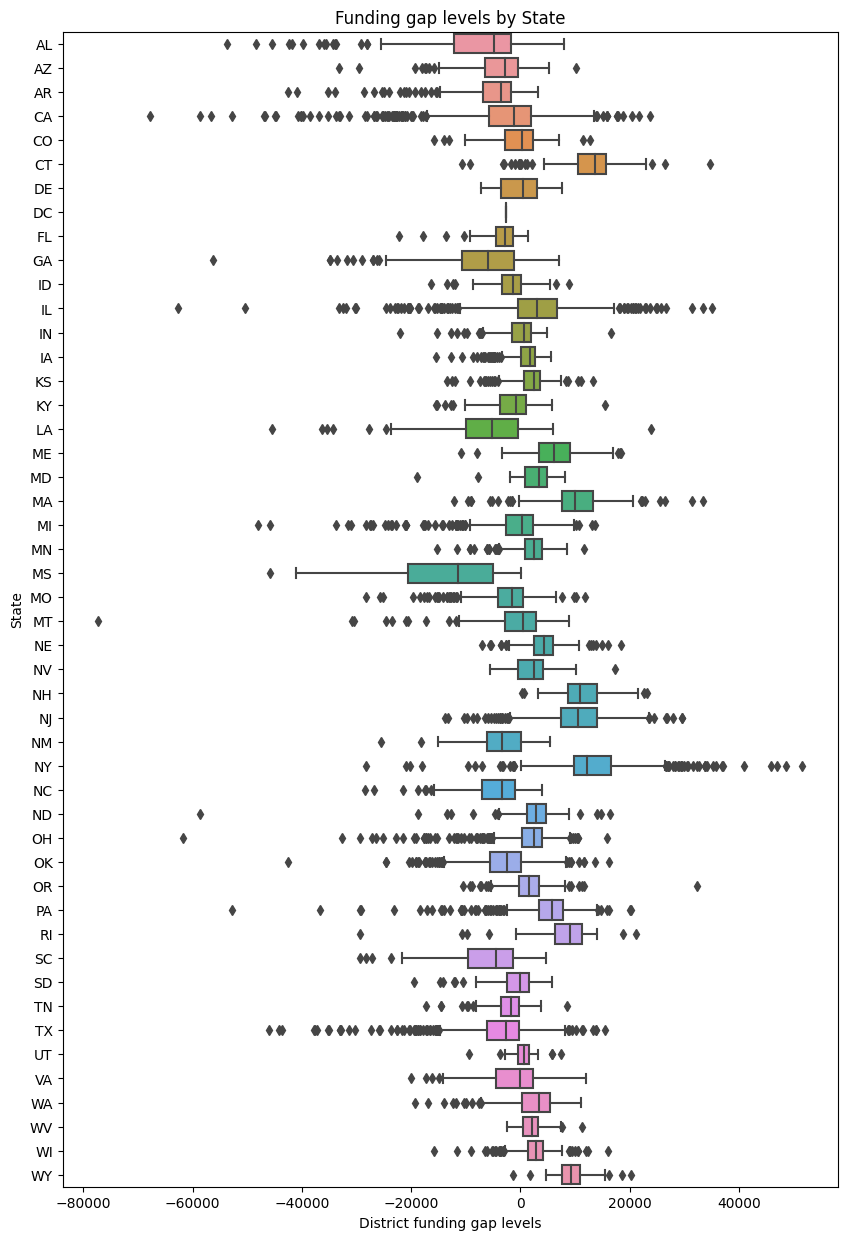

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a variable to filter the dataset by any year of interest
df_year = df[df['year'] == 2021]                    # Just like in section 1.3.1, you can use Boleans and comparison opperators to filter

# We specify a size for our figure, and then construct a boxplot. Here we are looking at the
plt.figure(figsize=(10, 15))                        # You can change the size
sns.boxplot(data=df_year, x="fundinggap", y="stabbr")     # You can change the values of x and/or y for variables that interest you

# Label our axes and title
plt.xlabel("District funding gap levels")
plt.ylabel("State")
plt.title("Funding gap levels by State")


#Print the plot
plt.show()

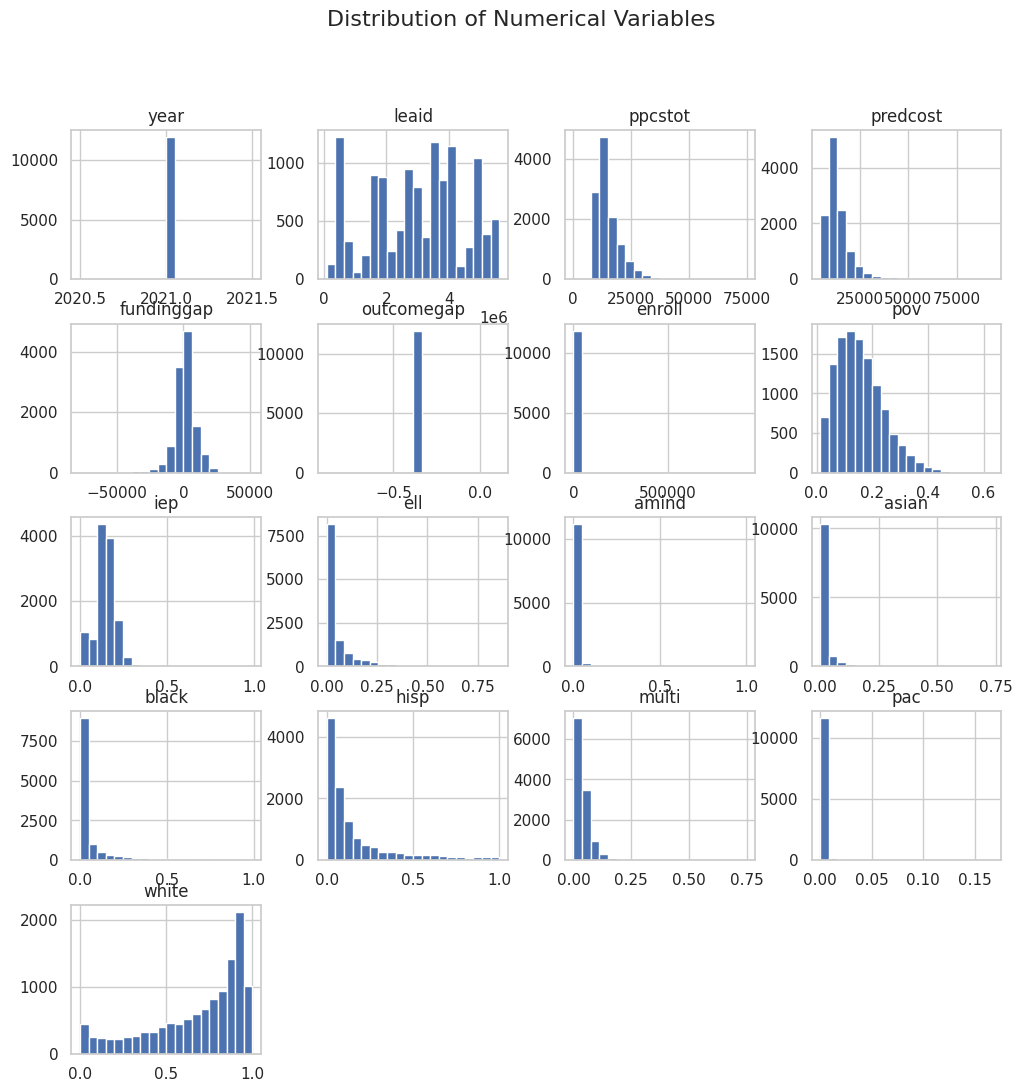

In [32]:
# Filter the dataframe for year 2021
df_hplot = df[df['year'] == 2021]  # This creates a filtered dataframe

# Create histograms for all numerical columns
df_hplot.hist(figsize=(12, 12), bins=20)

# Add title
plt.suptitle('Distribution of Numerical Variables', fontsize=16)

# Show the plot
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['RegionCode'] = label_encoder.fit_transform(df['Region'])
print(df.head())

In [ ]:
df['Race_Ethn'] = label_encoder.fit_transform(df['Majority_Group'])
print(df.head())

In [ ]:
# Create a count plot for ethnicity over time using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='Race_Ethn', palette='viridis')
plt.title('Distribution of Ethnicity Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend(title='Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# Add Region as a facet
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df, col='Region', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.countplot, x='year', hue='Race_Ethn', palette='viridis', dodge=True)
g.add_legend(title='Ethnicity')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Year", "Count")

# Adjust layout for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#We begin by importing plotly.express as px
import plotly.express as px

#Ask Abi about this idea
# Create an interactive scatter plot
fig = px.scatter(df,
                 x="ppcstot",
                 y="RegionCode",
                 size="enroll",
                 size_max=70,
                 color="year",                  # Both the color and size of the bubblues will reference the total enrollment of each district
                 hover_name="Region")


# Customize and show the plot
fig.update_layout(title='Interactive Plot')
fig.show()

In [33]:
# Calculate mean funding level by state and year
mean_funding = df.groupby(['state_name', 'year'])['ppcstot'].mean().reset_index()

# Formatting the output nicely
mean_funding['ppcstot'] = mean_funding['ppcstot'].map('${:,.2f}'.format)  # Formatting as currency

# Display the results
print(mean_funding)


    state_name  year     ppcstot
0      Alabama  2009   $8,914.73
1      Alabama  2010   $8,962.11
2      Alabama  2011   $8,906.53
3      Alabama  2012   $8,689.65
4      Alabama  2013   $8,925.08
..         ...   ...         ...
627    Wyoming  2017  $19,290.70
628    Wyoming  2018  $18,840.68
629    Wyoming  2019  $19,099.26
630    Wyoming  2020  $19,897.04
631    Wyoming  2021  $20,824.43

[632 rows x 3 columns]


In [34]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Check for normality using Shapiro-Wilk test
print("\nShapiro-Wilk Test Results:")
for year in df['year'].unique():
    stat, p_value = stats.shapiro(df[df['year'] == year]['ppcstot'])
    print(f"{year}: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 2. Check for homogeneity of variances using Levene's test
print("\nLevene's Test Results:")
stat, p_value = stats.levene(
    df[df['year'] == '2009']['ppcstot'],
    df[df['year'] == '2010']['ppcstot'],
    df[df['year'] == '2011']['ppcstot'],
    df[df['year'] == '2012']['ppcstot'],
    df[df['year'] == '2013']['ppcstot'],
    df[df['year'] == '2014']['ppcstot'],
    df[df['year'] == '2015']['ppcstot'],
    df[df['year'] == '2016']['ppcstot'],
    df[df['year'] == '2017']['ppcstot'],
    df[df['year'] == '2018']['ppcstot'],
    df[df['year'] == '2019']['ppcstot'],
    df[df['year'] == '2020']['ppcstot'],
    df[df['year'] == '2021']['ppcstot']
)
print(f"Levene's Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

# 3. Conduct One-Way ANOVA
model = ols('ppcstot ~ year', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print("\nANOVA Results:")
print(anova_table)


Shapiro-Wilk Test Results:
2009: Statistic=0.810, p-value=0.000
2010: Statistic=0.825, p-value=0.000
2011: Statistic=0.836, p-value=0.000
2012: Statistic=0.782, p-value=0.000
2013: Statistic=0.825, p-value=0.000
2014: Statistic=0.819, p-value=0.000
2015: Statistic=0.828, p-value=0.000
2016: Statistic=0.832, p-value=0.000
2017: Statistic=0.833, p-value=0.000
2018: Statistic=0.839, p-value=0.000
2019: Statistic=0.830, p-value=0.000
2020: Statistic=0.841, p-value=0.000
2021: Statistic=0.844, p-value=0.000

Levene's Test Results:
Levene's Test: Statistic=nan, p-value=nan

ANOVA Results:
                sum_sq        df             F  PR(>F)
year      2.681439e+11       1.0  13950.924034     0.0
Residual  3.056676e+12  159032.0           NaN     NaN


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12465.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12467.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12391.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12380.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.

In [35]:
from scipy.stats import shapiro, levene

# Check normality for each group
for state in df['state_name'].unique():
    stat, p = shapiro(df[df['state_name'] == state]['ppcstot'])
    print(f'State: {state}, Shapiro-Wilk Stat: {stat:.3f}, p-value: {p:.3f}')

# Check homogeneity of variances
stat, p = levene(*[df[df['state_name'] == state]['ppcstot'] for state in df['state_name'].unique()])
print(f'Levene’s Test Stat: {stat:.3f}, p-value: {p:.3f}')

State: Alabama, Shapiro-Wilk Stat: 0.945, p-value: 0.000
State: Arizona, Shapiro-Wilk Stat: 0.797, p-value: 0.000
State: Arkansas, Shapiro-Wilk Stat: 0.906, p-value: 0.000
State: California, Shapiro-Wilk Stat: 0.791, p-value: 0.000
State: Colorado, Shapiro-Wilk Stat: 0.914, p-value: 0.000
State: Connecticut, Shapiro-Wilk Stat: 0.932, p-value: 0.000
State: Delaware, Shapiro-Wilk Stat: 0.921, p-value: 0.000
State: District of Columbia, Shapiro-Wilk Stat: 0.942, p-value: 0.489


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10853.
  res = hypotest_fun_out(*samples, **kwds)


State: Florida, Shapiro-Wilk Stat: 0.899, p-value: 0.000
State: Georgia, Shapiro-Wilk Stat: 0.809, p-value: 0.000
State: Idaho, Shapiro-Wilk Stat: 0.890, p-value: 0.000
State: Illinois, Shapiro-Wilk Stat: 0.856, p-value: 0.000
State: Indiana, Shapiro-Wilk Stat: 0.872, p-value: 0.000
State: Iowa, Shapiro-Wilk Stat: 0.961, p-value: 0.000
State: Kansas, Shapiro-Wilk Stat: 0.942, p-value: 0.000
State: Kentucky, Shapiro-Wilk Stat: 0.890, p-value: 0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10497.
  res = hypotest_fun_out(*samples, **kwds)


State: Louisiana, Shapiro-Wilk Stat: 0.814, p-value: 0.000
State: Maine, Shapiro-Wilk Stat: 0.981, p-value: 0.000
State: Maryland, Shapiro-Wilk Stat: 0.965, p-value: 0.000
State: Massachusetts, Shapiro-Wilk Stat: 0.830, p-value: 0.000
State: Michigan, Shapiro-Wilk Stat: 0.772, p-value: 0.000
State: Minnesota, Shapiro-Wilk Stat: 0.934, p-value: 0.000
State: Mississippi, Shapiro-Wilk Stat: 0.920, p-value: 0.000
State: Missouri, Shapiro-Wilk Stat: 0.897, p-value: 0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6662.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6213.
  res = hypotest_fun_out(*samples, **kwds)


State: Montana, Shapiro-Wilk Stat: 0.916, p-value: 0.000
State: Nebraska, Shapiro-Wilk Stat: 0.939, p-value: 0.000
State: Nevada, Shapiro-Wilk Stat: 0.747, p-value: 0.000
State: New Hampshire, Shapiro-Wilk Stat: 0.988, p-value: 0.000
State: New Jersey, Shapiro-Wilk Stat: 0.928, p-value: 0.000
State: New Mexico, Shapiro-Wilk Stat: 0.928, p-value: 0.000
State: New York, Shapiro-Wilk Stat: 0.852, p-value: 0.000
State: North Carolina, Shapiro-Wilk Stat: 0.872, p-value: 0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6897.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8611.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7905.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6308.
  res = hypotest_fun_out(*samples, **kwds)


State: North Dakota, Shapiro-Wilk Stat: 0.927, p-value: 0.000
State: Ohio, Shapiro-Wilk Stat: 0.907, p-value: 0.000
State: Oklahoma, Shapiro-Wilk Stat: 0.839, p-value: 0.000
State: Oregon, Shapiro-Wilk Stat: 0.858, p-value: 0.000
State: Pennsylvania, Shapiro-Wilk Stat: 0.936, p-value: 0.000
State: Rhode Island, Shapiro-Wilk Stat: 0.688, p-value: 0.000
State: South Carolina, Shapiro-Wilk Stat: 0.936, p-value: 0.000
State: South Dakota, Shapiro-Wilk Stat: 0.889, p-value: 0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6473.
  res = hypotest_fun_out(*samples, **kwds)
/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13016.
  res = hypotest_fun_out(*samples, **kwds)


State: Tennessee, Shapiro-Wilk Stat: 0.954, p-value: 0.000
State: Texas, Shapiro-Wilk Stat: 0.831, p-value: 0.000
State: Utah, Shapiro-Wilk Stat: 0.863, p-value: 0.000
State: Vermont, Shapiro-Wilk Stat: 0.967, p-value: 0.000
State: Virginia, Shapiro-Wilk Stat: 0.854, p-value: 0.000
State: Washington, Shapiro-Wilk Stat: 0.910, p-value: 0.000
State: West Virginia, Shapiro-Wilk Stat: 0.844, p-value: 0.000
State: Wisconsin, Shapiro-Wilk Stat: 0.775, p-value: 0.000


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5384.
  res = hypotest_fun_out(*samples, **kwds)


State: Wyoming, Shapiro-Wilk Stat: 0.840, p-value: 0.000
Levene’s Test Stat: 430.354, p-value: 0.000


In [36]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
# Select relevant features 
features = df[['ppcstot', 'predcost', 'fundinggap', 'enroll', 'pov', 'iep', 'ell', 'amind', 'asian', 'black', 'hisp', 'multi', 'pac','white']]
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

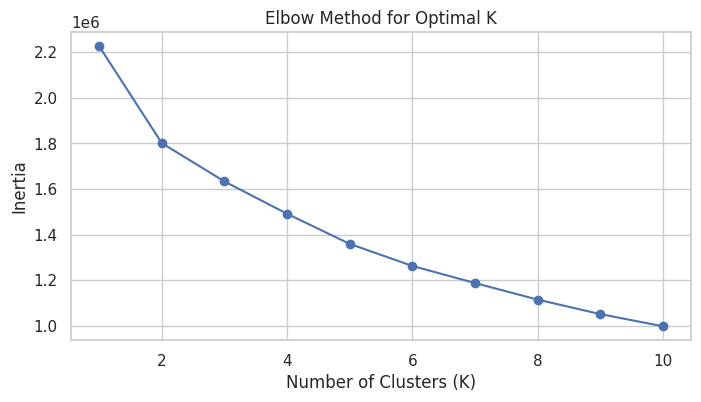

In [38]:
import matplotlib.pyplot as plt
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [39]:
# Fit the K-Means model
optimal_k = 3  # Replace with the optimal K determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [47]:
print(cluster_summary[cluster_summary['Cluster'] == 0])

   Cluster   fundinggap     amind     asian     black      hisp     multi  \
0        0  2852.744748  0.013828  0.019051  0.032426  0.073494  0.024657   

        pac     white  
0  0.000988  0.835556  


In [48]:
print(cluster_summary[cluster_summary['Cluster'] == 1])

   Cluster  fundinggap     amind     asian     black      hisp     multi  \
1        1 -9735.84058  0.138684  0.008876  0.393265  0.082702  0.040118   

        pac     white  
1  0.000742  0.335613  


In [49]:
print(cluster_summary[cluster_summary['Cluster'] == 2])

   Cluster   fundinggap     amind     asian     black      hisp     multi  \
2        2 -4967.795154  0.009378  0.043668  0.062858  0.575772  0.022159   

        pac     white  
2  0.002981  0.283184  


In [51]:
#Figure out why poverty and ell are not included: # Check the mean values of each feature per cluster
cluster_summary = df.groupby('Cluster')[scaled_features].mean().reset_index()
print(cluster_summary)

ValueError: Index data must be 1-dimensional

In [40]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'enroll': 'mean',
    'pov': 'mean',
    'iep': 'mean',
    'ell': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster   fundinggap        enroll       pov       iep       ell
0        0  2852.744748   2570.237329  0.145191  0.142287  0.020090
1        1 -9735.840580   4699.119549  0.307915  0.157590  0.042954
2        2 -4967.795154  10606.132900  0.227082  0.110335  0.206443


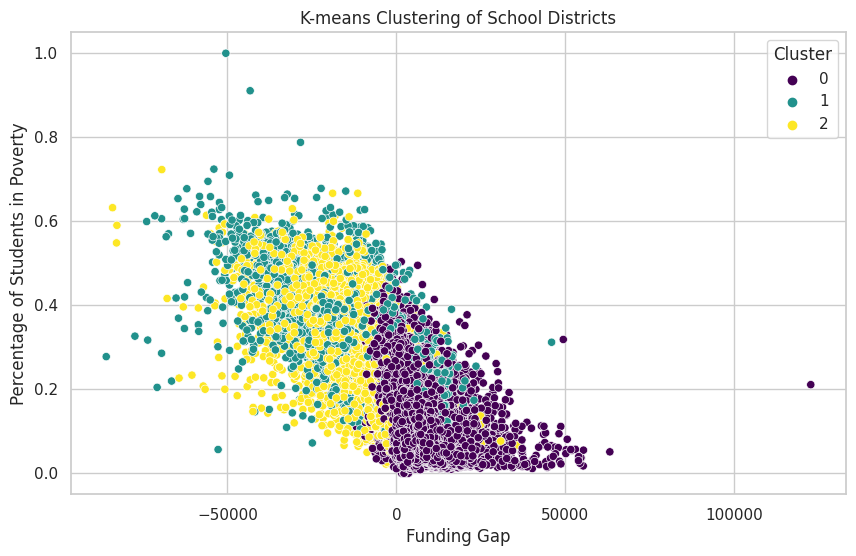

In [42]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='pov', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Students in Poverty')
plt.show()

In [43]:
cluster_summary = df.groupby('Cluster').agg({
    'fundinggap': 'mean',
    'amind': 'mean',
    'asian': 'mean',
    'black': 'mean',    
    'hisp': 'mean',
    'multi': 'mean',
    'pac': 'mean',
    'white': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster   fundinggap     amind     asian     black      hisp     multi  \
0        0  2852.744748  0.013828  0.019051  0.032426  0.073494  0.024657   
1        1 -9735.840580  0.138684  0.008876  0.393265  0.082702  0.040118   
2        2 -4967.795154  0.009378  0.043668  0.062858  0.575772  0.022159   

        pac     white  
0  0.000988  0.835556  
1  0.000742  0.335613  
2  0.002981  0.283184  


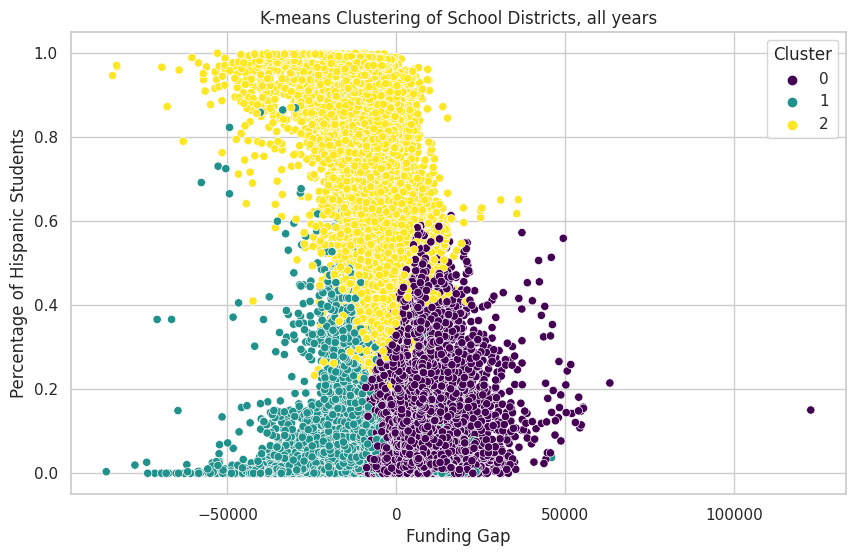

In [44]:
import seaborn as sns

# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fundinggap', y='hisp', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of School Districts, all years')
plt.xlabel('Funding Gap')
plt.ylabel('Percentage of Hispanic Students')
plt.show()

In [ ]:
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ppcstot'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Actual Spending')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Explore this idea with Abi
# Plotting the clusters (using two features for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Race_Ethn'], y=df['fundinggap'], hue=df['cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Race_Ethn')
plt.ylabel('Funding Gap')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Explore this idea with Abi
# Visualize Funding Gap vs. Percentage of Minority Students
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='fundinggap', label='Funding Gap', marker='o')
sns.lineplot(data=df, x='year', y='black', label='Black students', marker='s')
plt.title('Funding Gaps and Black students Over Time')
plt.ylabel('Funding Gap / Black students')
plt.xlabel('Year')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
def find_optimal_clusters(scaled_features, max_clusters=6):
    """
    Find the optimal number of clusters using the elbow method and silhouette score.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    max_clusters (int): Maximum number of clusters to try
    
    Returns:
    tuple: (inertias, silhouette_scores)
    """
    inertias = []
    silhouette_scores = []
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_features)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
        
    return inertias, silhouette_scores

In [ ]:
def plot_clustering_metrics(inertias, silhouette_scores):
    """
    Plot the elbow curve and silhouette scores.
    
    Parameters:
    inertias (list): List of inertia values
    silhouette_scores (list): List of silhouette scores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot elbow curve
    ax1.plot(range(2, len(inertias) + 2), inertias, marker='o')
    ax1.set_xlabel('Number of clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    
    # Plot silhouette scores
    ax2.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    ax2.set_xlabel('Number of clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def perform_clustering(scaled_features, n_clusters):
    """
    Perform K-means clustering with the specified number of clusters.
    
    Parameters:
    scaled_features (numpy.array): Scaled feature array
    n_clusters (int): Number of clusters to create
    
    Returns:
    tuple: (KMeans model, cluster labels)
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    return kmeans, labels

def analyze_clusters(df, feature_columns, labels, scaler):
    """
    Analyze the characteristics of each cluster.
    
    Parameters:
    df (pandas.DataFrame): Original dataframe
    feature_columns (list): List of feature columns used
    labels (numpy.array): Cluster labels
    scaler (StandardScaler): Fitted scaler object
    
    Returns:
    pandas.DataFrame: Cluster analysis results
    """
    # Add cluster labels to the original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = labels
    
    # Calculate cluster means
    cluster_means = df_with_clusters.groupby('Cluster')[feature_columns].mean()
    
    # Calculate cluster sizes
    cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
    
    return cluster_means, cluster_sizes

def plot_cluster_characteristics(cluster_means, feature_columns):
    """
    Create a heatmap of cluster characteristics.
    
    Parameters:
    cluster_means (pandas.DataFrame): Mean values for each cluster
    feature_columns (list): List of feature columns used
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(cluster_means, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
    plt.title('Cluster Characteristics Heatmap')
    plt.show()

In [ ]:
# View all data points in cluster 0
cluster_0 = df[df['cluster'] == 0]
print(cluster_0)